In [1]:
from __future__ import  division
import numpy as np
import pandas as pd
import timeit


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc

x1 = pd.read_csv('train_features.csv')
x2 = pd.read_csv('magicfeat_train.csv')
x3 = pd.read_csv('fanokas.csv')
x4 = pd.read_csv('owl_feat.csv')
x5 = pd.read_csv('jacfeat.csv')

col_to_drop = ['z_len1','z_len2','z_word_len1','z_word_len2','z_word_match']

x4.drop(col_to_drop, inplace = True, axis = 1)

xf = pd.concat([x1,x2.ix[:,2:],x3.ix[:,1:],x4.ix[:,9:],x5.ix[:,1:]], axis = 1)

x1t = pd.read_csv('test_features.csv')
x2t = pd.read_csv('magicfeat_test.csv')
x3t = pd.read_csv('fanokas_test.csv')
x4t = pd.read_csv('owl_feat_test.csv')
x5t = pd.read_csv('jacfeat_test.csv')

col_to_drop = ['z_len1','z_len2','z_word_len1','z_word_len2','z_word_match']

x4t.drop(col_to_drop, inplace = True, axis = 1)

xft = pd.concat([x1t,x2t.ix[:,2:],x3t.ix[:,1:],x4t.ix[:,6:],x5t.ix[:,1:]], axis = 1)

X = xf.ix[:,2:]

y = X['is_duplicate'].values

X.drop('is_duplicate', inplace = True, axis = 1)

col_to_drop = ['q1_hash','q2_hash']

X.drop(col_to_drop, inplace = True, axis = 1)

# sbtr = np.loadtxt("sbenchfeat_tsvd100_train.gz", delimiter=",")
rstr = np.loadtxt("russ_tr.gz", delimiter=",")
rspacetr = np.loadtxt("russpacy_tr.gz", delimiter=",")

# sbts = np.loadtxt("sbenchfeat_tsvd100_test.gz", delimiter=",")
rsts = np.loadtxt("russ_ts.gz", delimiter=",")
rspacets = np.loadtxt("russpacy_ts.gz", delimiter=",")


magic2tr = np.loadtxt("magic2_tr.gz", delimiter=",")
magic2ts = np.loadtxt("magic2_ts.gz", delimiter=",")

magic3tr = np.loadtxt("magic3_tr.gz", delimiter=",")
magic3ts = np.loadtxt("magic3_ts.gz", delimiter=",")

# x_train = np.column_stack((np.array(X),rstr[:,0:17],rstr[:,18:20],rspacetr[:,0:3],sbtr,magic2tr,magic3tr))

# print x_train.shape

xtest = xft.ix[:,2:]

col_to_drop = ['q1_hash','q2_hash']
xtest.drop(col_to_drop, inplace = True, axis = 1)

# x_test = np.column_stack((np.array(xtest),rsts[:,0:17],rsts[:,18:20],rspacets[:,0:3],sbts,magic2ts,magic3ts))

# print x_test.shape



/usr/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:65: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the

In [2]:
xgbtr = np.loadtxt("train_stacker_xgb1.csv", delimiter=",")
xgbts = np.loadtxt("test_stacker_xgb1.csv", delimiter=",")

# lstmtr = np.loadtxt("train_stacker_lstm2.csv", delimiter=",")
# lstmts = np.loadtxt("test_stacker_lstm2.csv", delimiter=",")

lstmtr1 = np.loadtxt("train_stacker_lstm4.csv", delimiter=",")
lstmts1 = np.loadtxt("test_stacker_lstm4.csv", delimiter=",")


In [99]:
x2.ix[:,4:6]

,q1_freq,q2_freq
0,1,2
1,8,3
2,2,1
3,1,1
4,3,1
5,1,1
6,1,1
7,1,1
8,2,3
9,1,1


In [4]:
mgtr = pd.read_csv('new_magic_train.csv')
mgts = pd.read_csv('new_magic_test.csv')                

pgtr = pd.read_csv('pagerank_train.csv')
pgts = pd.read_csv('pagerank_test.csv')                

# mgts.iloc[:,2]

In [12]:
# id_tr = np.array(range(0,x_train.shape[0]))
# id_ts = np.array(range(0,x_test.shape[0]))

xgb_metatr = np.loadtxt("2train_stacker_xgb3.gz", delimiter=",")
xgb_metats = np.loadtxt("2test_stacker_xgb3.gz", delimiter=",")

lbm_metatr = np.loadtxt("2train_stacker_lgbm1.gz", delimiter=",")
lbm_metats = np.loadtxt("2test_stacker_lgbm1.gz", delimiter=",")

nn_metatr = np.array(pd.read_csv('2train_stacker_nnlight.csv'))
nn_metats = np.loadtxt("2test_stacker_nnlight.csv", delimiter=",")


# id_tr.shape

In [162]:
# nntr = np.array(pd.read_csv('train_stacker.csv'))
# nnts = np.loadtxt("test_stacker_nn1.csv", delimiter=",")

# rftr = np.loadtxt("train_stacker_rf1.csv", delimiter=",")
# rfts = np.loadtxt("test_stacker_rf1.csv", delimiter=",")

# lrtr = np.loadtxt("train_stacker_lr1.csv", delimiter=",")
# lrts = np.loadtxt("test_stacker_lr1.csv", delimiter=",")

# nntr1 = np.array(pd.read_csv('train_stacker_nn2.csv'))
# nnts1 = np.loadtxt("test_stacker_nn2.csv", delimiter=",")

# glvtr = np.loadtxt("train_stacker_glv1.csv", delimiter=",")
# glvts = np.loadtxt("test_stacker_glv1.csv", delimiter=",")

# lstmtr2 = np.loadtxt("train_stacker_lstm4t.csv", delimiter=",")
# lstmts2 = np.loadtxt("test_stacker_lstm4t.csv", delimiter=",")

# sgtr = np.loadtxt("train_stacker_sgd1.csv", delimiter=",")
# sgts = np.loadtxt("test_stacker_sgd1.csv", delimiter=",")

# lbmtr = np.loadtxt("train_stacker_lgbm1.csv", delimiter=",")
# lbmts = np.loadtxt("test_stacker_lgbm1.csv", delimiter=",")

# sbenchtr = np.loadtxt("train_stacker_sbench1.csv", delimiter=",")
# sbenchts = np.loadtxt("test_stacker_sbench1.csv", delimiter=",")

# sbtr1 = np.loadtxt("train_stacker_sbench2.gz", delimiter=",")
# sbts1 = np.loadtxt("test_stacker_sbench2.gz", delimiter=",")

# sbtr2 = np.loadtxt("train_stacker_sbench3.gz", delimiter=",")
# sbts2 = np.loadtxt("test_stacker_sbench3.gz", delimiter=",")

# contr = np.loadtxt("train_stacker_conv2.gz", delimiter=",")
# conts = np.loadtxt("test_stacker_conv2.gz", delimiter=",")

# xgbtr1 = np.loadtxt("train_stacker_xgn1.csv", delimiter=",")
# xgbts1 = np.loadtxt("test_stacker_xgn1.csv", delimiter=",")

# nlp_tr = np.loadtxt("lstm_feat_train1.gz",  delimiter="," )
# nlp_ts = np.loadtxt("lstm_feat_test1.gz",  delimiter=",")

# lstmtr3 = np.loadtxt("train_stacker_lstm4t2.gz", delimiter=",")
# lstmts3 = np.loadtxt("test_stacker_lstm4t2.gz", delimiter=",")

# nntr3 = np.array(pd.read_csv('train_stacker_nn3n.csv'))
# nnts3 = np.loadtxt("test_stacker_nn3n.csv", delimiter=",")

# rftr1 = np.loadtxt("train_stacker_rf2.csv", delimiter=",")
# rfts1 = np.loadtxt("test_stacker_rf2.csv", delimiter=",")

# lbmtr1 = np.loadtxt("train_stacker_lgbm3.csv", delimiter=",")
# lbmts1 = np.loadtxt("test_stacker_lgbm3.csv", delimiter=",")

# nntr4 = np.array(pd.read_csv('train_stacker_nn4n.csv'))
# nnts4 = np.loadtxt("test_stacker_nn4n.csv", delimiter=",")

# lrtr1 = np.loadtxt("train_stacker_lr3.csv", delimiter=",")
# lrts1 = np.loadtxt("test_stacker_lr3.csv", delimiter=",")

# owltr = np.loadtxt("train_stacker_xgbowl1.csv", delimiter=",")
# owlts = np.loadtxt("test_stacker_xgbowl1.csv", delimiter=",")

# lstmtr4 = np.loadtxt("train_stacker_lstm5t.gz", delimiter=",")
# lstmts4 = np.loadtxt("test_stacker_lstm5t.gz", delimiter=",")

# sbxgtr = np.loadtxt("train_stacker_sbxgb.gz", delimiter=",")
# sbxgts = np.loadtxt("test_stacker_sbxgb.gz", delimiter=",")

# aqtr = np.loadtxt("train_stacker_aqnet.gz", delimiter=",")
# aqts = np.loadtxt("test_stacker_aqnet.gz", delimiter=",")

# svdtr = np.loadtxt("train_stacker_nlpsvd.gz", delimiter=",")
# svdts = np.loadtxt("test_stacker_nlpsvd.gz", delimiter=",")

# svxgtr = np.loadtxt("train_stacker_svdxg.gz", delimiter=",")
# svxgts = np.loadtxt("test_stacker_svdxg.gz", delimiter=",")

# sbxgtr1 = np.loadtxt("train_stacker_sbxgb1.gz", delimiter=",")
# sbxgts1 = np.loadtxt("test_stacker_sbxgb1.gz", delimiter=",")

# rsooftr1 = np.loadtxt("train_russoof_1.gz", delimiter=",")
# rsoofts1 = np.loadtxt("test_russoof_1.gz", delimiter=",")

# rsooftr2 = np.loadtxt("train_russoof_2.gz", delimiter=",")
# rsoofts2 = np.loadtxt("test_russoof_2.gz", delimiter=",")

# rsooftr3 = np.loadtxt("train_russoof_3.gz", delimiter=",")
# rsoofts3 = np.loadtxt("test_russoof_3.gz", delimiter=",")

# rsooftr4 = np.loadtxt("train_russoof_4.gz", delimiter=",")
# rsoofts4 = np.loadtxt("test_russoof_4.gz", delimiter=",")

# rsooftr5 = np.loadtxt("train_russoof_5.gz", delimiter=",")
# rsoofts5 = np.loadtxt("test_russoof_5.gz", delimiter=",")

# rsooftr6 = np.loadtxt("train_russoof_6.gz", delimiter=",")
# rsoofts6 = np.loadtxt("test_russoof_6.gz", delimiter=",")

# x_train = np.column_stack((np.array(X),rstr[:,0:17],rstr[:,18:20],rspacetr[:,0:3],lbmtr,xgbtr1,contr,sbenchtr,sbtr1,
#                            sbtr2,xgb_metatr,lbm_metatr,nn_metatr,lstmtr3,svdtr,pgtr,mgtr.iloc[:,2],
#                           xgbtr,nntr,lstmtr1,nntr1,sgtr,glvtr,lstmtr2,lrtr,rftr,nntr3,lstmtr4,aqtr,owltr,magic2tr,magic3tr,
#                           rftr1,nntr4,lbmtr1,lrtr1,svxgtr,sbxgtr1,rsooftr1,rsooftr2,rsooftr3,rsooftr4,rsooftr5,rsooftr6))

# x_test = np.column_stack((np.array(xtest),rsts[:,0:17],rsts[:,18:20],rspacets[:,0:3],lbmts,xgbts1,conts,sbenchts,sbts1,
#                           sbts2,xgb_metats,lbm_metats,nn_metats,lstmts3,svdts,pgts,mgts.iloc[:,2],
#                           xgbts,nnts,lstmts1,nnts1,sgts,glvts,lstmts2,lrts,rfts,nnts3,lstmts4,aqts,owlts,magic2ts,magic3ts,
#                           rfts1,nnts4,lbmts1,lrts1,svxgts,sbxgts1,rsoofts1,rsoofts2,rsoofts3,rsoofts4,rsoofts5,rsoofts6))

x_train = np.column_stack((sbenchtr,lbmtr,xgbtr1,contr,sbtr1,sbtr2,xgb_metatr,lbm_metatr,nn_metatr,lstmtr3,svdtr,
                          xgbtr,nntr,lstmtr1,nntr1,sgtr,glvtr,lstmtr2,lrtr,rftr,nntr3,lstmtr4,aqtr,owltr,magic2tr,magic3tr,
                          rftr1,nntr4,lbmtr1,lrtr1,svxgtr,sbxgtr1,rsooftr1,rsooftr2,rsooftr3,rsooftr4,rsooftr5,rsooftr6))

x_test = np.column_stack((sbenchts,lbmts,xgbts1,conts,sbts1,sbts2,xgb_metats,lbm_metats,nn_metats,lstmts3,svdts,
                          xgbts,nnts,lstmts1,nnts1,sgts,glvts,lstmts2,lrts,rfts,nnts3,lstmts4,aqts,owlts,magic2ts,magic3ts,
                          rfts1,nnts4,lbmts1,lrts1,svxgts,sbxgts1,rsoofts1,rsoofts2,rsoofts3,rsoofts4,rsoofts5,rsoofts6))


# owltr,magic2tr,magic3tr,,owlts,magic2ts,magic3ts
print x_train.shape
print x_test.shape

(404290, 39)
(2345796, 39)


In [151]:
np.savetxt("3train_feat.gz", x_train, delimiter=",", fmt='%.6f')

np.savetxt("3test_feat.gz", x_test, delimiter=",", fmt='%.6f')

In [164]:
RS = 2016
ROUNDS = 400

print("Started")
np.random.seed(RS)
input_folder = ''

import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.005
params['max_depth'] = 6
params['seed'] = RS
# params['gamma'] = 5
params['subsample'] = 0.95
params['colsample_bytree'] = 0.75
params['min_child_weight'] = 10
params['reg_alpha'] = 2
# params['reg_lambda'] = 2
params['n_jobs'] = 32

from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

y_train = np.array(y)

train_stacker=[ [0.0 for s in range(1)]  for k in range (0,(x_train.shape[0])) ]

cv_scores = []
oof_preds = []
a = [0 for x in range(2345796)]
# StratifiedKFold
# kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
# for dev_index, val_index in kf.split(range(x_train.shape[0]),y_train):
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(x_train.shape[0])):
        dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]
        print dev_X.shape
        print val_X.shape
        
        pos_train = dev_X[dev_y == 1]
        neg_train = dev_X[dev_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        Xd = np.concatenate((pos_train, neg_train))
        yd = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        pos_train = val_X[val_y == 1]
        neg_train = val_X[val_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        Xv = np.concatenate((pos_train, neg_train))
        yv = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        print dev_X.shape
        print val_X.shape

        d_train = xgb.DMatrix(Xd, label=yd)
        d_valid = xgb.DMatrix(Xv, label=yv)

        watchlist = [(d_train, 'train'), (d_valid, 'valid')]

        bst = xgb.train(params, d_train, 5000, watchlist, early_stopping_rounds=25, verbose_eval=100)
        # ntree_limit=model.best_ntree_limit
        preds = bst.predict(d_valid, ntree_limit=bst.best_ntree_limit)
        cv_scores.append(log_loss(yv, preds))
        print(cv_scores)
#         break
        
        d_test = xgb.DMatrix(x_test)
        preds_tr = bst.predict(d_test, ntree_limit=bst.best_ntree_limit)

        a = np.column_stack((a,preds_tr))

        d_valorg = xgb.DMatrix(val_X, label=val_y)
        predsorg = bst.predict(d_valorg, ntree_limit=bst.best_ntree_limit)

#         predictions = preds.reshape(-1,1)
        no=0
        for real_index in val_index:
            for d in range (0,1):
                train_stacker[real_index][d]=(predsorg[no])
            no+=1

# b = pd.DataFrame(a)
# b['sum'] = b.sum(axis = 1)/5

# sub = pd.DataFrame()
# sub['test_id'] = x4t['test_id']
# sub['is_duplicate'] = b['sum']
# sub.to_csv("xgb_stack_16.csv", index=False)
# [0.14679638005158449, 0.14643568394088646, 0.14695301106657524, 0.14738008193419261, 0.14605956315322077]
# [0.14629926832710563, 0.14606952289254052, 0.14638265721616533, 0.14687541244637101, 0.14573516873536307]
# [0.14655595844865862, 0.14596795960342543, 0.14643300162670578]
# [0.14655595844865862, 0.14596795960342543, 0.14643300162670578, 0.1472989982452006, 0.1460610474228651]
# [0.14681656791503989, 0.14627290312044094, 0.14712146834967574, 0.14773910422640363, 0.14630592158639893]
# [0.14639234763909087, 0.14569616587687539, 0.14647693750567869, 0.1470194202825103, 0.14583537522827511]
# [0.14633978851522797, 0.14547056343098994, 0.1462774578658336, 0.14666908841973081, 0.14591071212086731]
# [0.14604253466505532, 0.14526491434032673, 0.14594325619907694, 0.14651440185039458, 0.14559316344188111]
# [0.14617171795151768, 0.14555889283206599, 0.14620601573073846, 0.14679953331829179, 0.14573525765371792]

# [0.14605396414966829, 0.14552495830927542, 0.14597708259252917, 0.14655229686031751, 0.1453054463522597]

Started
(323432, 39)
(80858, 39)
Oversampling started for proportion: 0.369026565089
Oversampling done, new proportion: 0.191259632688
Oversampling started for proportion: 0.369883004774
Oversampling done, new proportion: 0.191181170815
(323432, 39)
(80858, 39)
[0]	train-logloss:0.689043	valid-logloss:0.689035
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 25 rounds.
[100]	train-logloss:0.418635	valid-logloss:0.418548
[200]	train-logloss:0.291971	valid-logloss:0.292245
[300]	train-logloss:0.22568	valid-logloss:0.226458
[400]	train-logloss:0.189308	valid-logloss:0.190572
[500]	train-logloss:0.168819	valid-logloss:0.17054
[600]	train-logloss:0.157087	valid-logloss:0.159222
[700]	train-logloss:0.150284	valid-logloss:0.152816
[800]	train-logloss:0.146267	valid-logloss:0.14915
[900]	train-logloss:0.143849	valid-logloss:0.147038
[1000]	train-logloss:0.142358	valid-logloss:0.145811
[1100]	train-loglos

In [61]:
b = pd.DataFrame(a)

b['sum'] = b.sum(axis = 1)/5
# [0.14600727370188754, 0.14544825295074776, 0.14596532675096102, 0.14650781185934783, 0.14528044902433937]
# [0.14607445705137667, 0.14547740551268393, 0.14587153345507556, 0.14642157045202223, 0.1452241104178662]
# [0.1459919657664169, 0.1454384662685565, 0.14583130137423958, 0.14653725802725331, 0.14523262817425422]
# [0.14594534065203074, 0.14540613940843813, 0.14575943927277321, 0.14645383820660426, 0.14524890892410494]
# [0.14597443603330801, 0.14480043444652063, 0.14525341818071591, 0.14604332789310262, 0.14481647042907519]
# [0.14592741293875855, 0.1446144748158234, 0.14505227943520599, 0.14599320073826713, 0.14470319974679161]
# [0.14563385252705296, 0.14461794367881492, 0.14475958050019688, 0.14593929909917952, 0.14451138835557784]
# [0.14561401066422744, 0.14434587350455086, 0.14469600766340365, 0.14577312842825135, 0.14447393471245529]
# [0.1445950168279444, 0.14398874044809273, 0.14453248459062426, 0.14515394631723633, 0.14366273762810131]
# [0.14422273607572852, 0.14306190447034878, 0.14320179686051809, 0.14447022824303118, 0.14265517230783645]
# [0.14402145142521824, 0.14292811676006567, 0.14314733916378442, 0.14422494220235443, 0.14261435321214111]

In [62]:
sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = b['sum']
sub.to_csv("xgb_stack_18.csv", index=False)


In [169]:
from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

y_train = np.array(y)

train_stacker=[ [0.0 for s in range(1)]  for k in range (0,(x_train.shape[0])) ]

cv_scores = []
oof_preds = []
a = [0 for x in range(2345796)]
# StratifiedKFold
kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(x_train.shape[0]),y_train):
# kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
# for dev_index, val_index in kf.split(range(x_train.shape[0])):
        dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]
        print dev_X.shape
        print val_X.shape

        d_train = xgb.DMatrix(dev_X, label=dev_y)
        d_valid = xgb.DMatrix(val_X, label=val_y)

        watchlist = [(d_train, 'train'), (d_valid, 'valid')]

        bst = xgb.train(params, d_train, 5000, watchlist, early_stopping_rounds=25, verbose_eval=100)
        # ntree_limit=model.best_ntree_limit
        preds = bst.predict(d_valid, ntree_limit=bst.best_ntree_limit)

        cv_scores.append(log_loss(val_y, preds))

        print(cv_scores)
#         break
        
        d_test = xgb.DMatrix(x_test)
        ptr = bst.predict(d_test, ntree_limit=bst.best_ntree_limit)
        
        m = 0.1742 / 0.369 
        n = (1 - 0.1742) / (1 - 0.369)

        preds_tr = m * ptr / (m * ptr + n * (1 - ptr))

        a = np.column_stack((a,preds_tr))

        no=0
        for real_index in val_index:
            for d in range (0,1):
                train_stacker[real_index][d]=(preds[no])
            no+=1


(323431, 39)
(80859, 39)
[0]	train-logloss:0.689336	valid-logloss:0.689346
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 25 rounds.
[100]	train-logloss:0.438562	valid-logloss:0.439317
[200]	train-logloss:0.32133	valid-logloss:0.32267
[300]	train-logloss:0.260185	valid-logloss:0.262062
[400]	train-logloss:0.226738	valid-logloss:0.22906
[500]	train-logloss:0.207964	valid-logloss:0.210652
[600]	train-logloss:0.197231	valid-logloss:0.200218
[700]	train-logloss:0.190991	valid-logloss:0.194238
[800]	train-logloss:0.187278	valid-logloss:0.190755
[900]	train-logloss:0.185014	valid-logloss:0.188693
[1000]	train-logloss:0.183605	valid-logloss:0.187474
[1100]	train-logloss:0.182692	valid-logloss:0.18674
[1200]	train-logloss:0.182069	valid-logloss:0.186287
[1300]	train-logloss:0.181598	valid-logloss:0.185984
[1400]	train-logloss:0.181227	valid-logloss:0.185786
[1500]	train-logloss:0.180877	valid-logloss:0

In [167]:
# [0.18880335309362842, 0.18801828370599291, 0.18785027919053612, 0.18894454006251779, 0.18767936468008359]
# [0.18868942190684651, 0.18696706128012827, 0.18663978014219634, 0.18821848688990747, 0.18666975335206612]
# [0.18844793317579234, 0.18679252873047139, 0.18617363049655314, 0.18787651645561473, 0.18658128432138549]
# [0.18836814453853373, 0.18666654678319805, 0.18611280448351419, 0.18785123997003758, 0.18637769772650983]
# [0.18692333977020642, 0.18571598922110646, 0.18574369308099167, 0.18692709768084501, 0.18537371455293869]
# [0.18653777996241505, 0.18444821738266107, 0.18413882199040532, 0.18570046653557878, 0.18392717849489101]
b1 = pd.DataFrame(a)

b1['sum'] = b1.sum(axis = 1)/5

In [170]:
b1 = pd.DataFrame(a)

b1['sum'] = b1.sum(axis = 1)/5

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = b1['sum']
sub.to_csv("xgb_stack_24.csv", index=False)


In [66]:
a = 0.1742 / 0.369 
b = (1 - 0.1742) / (1 - 0.369)
print a 
print b 
function to convert is f(x) = a * x / (a * x + b * (1 - x))

0.471830985915
1.30913126189


In [12]:
np.savetxt("2train_stacker_xgb3.gz", train_stacker, delimiter=",", fmt='%.6f')

np.savetxt("2test_stacker_xgb3.gz", np.array(b['sum']), delimiter=",", fmt='%.6f')

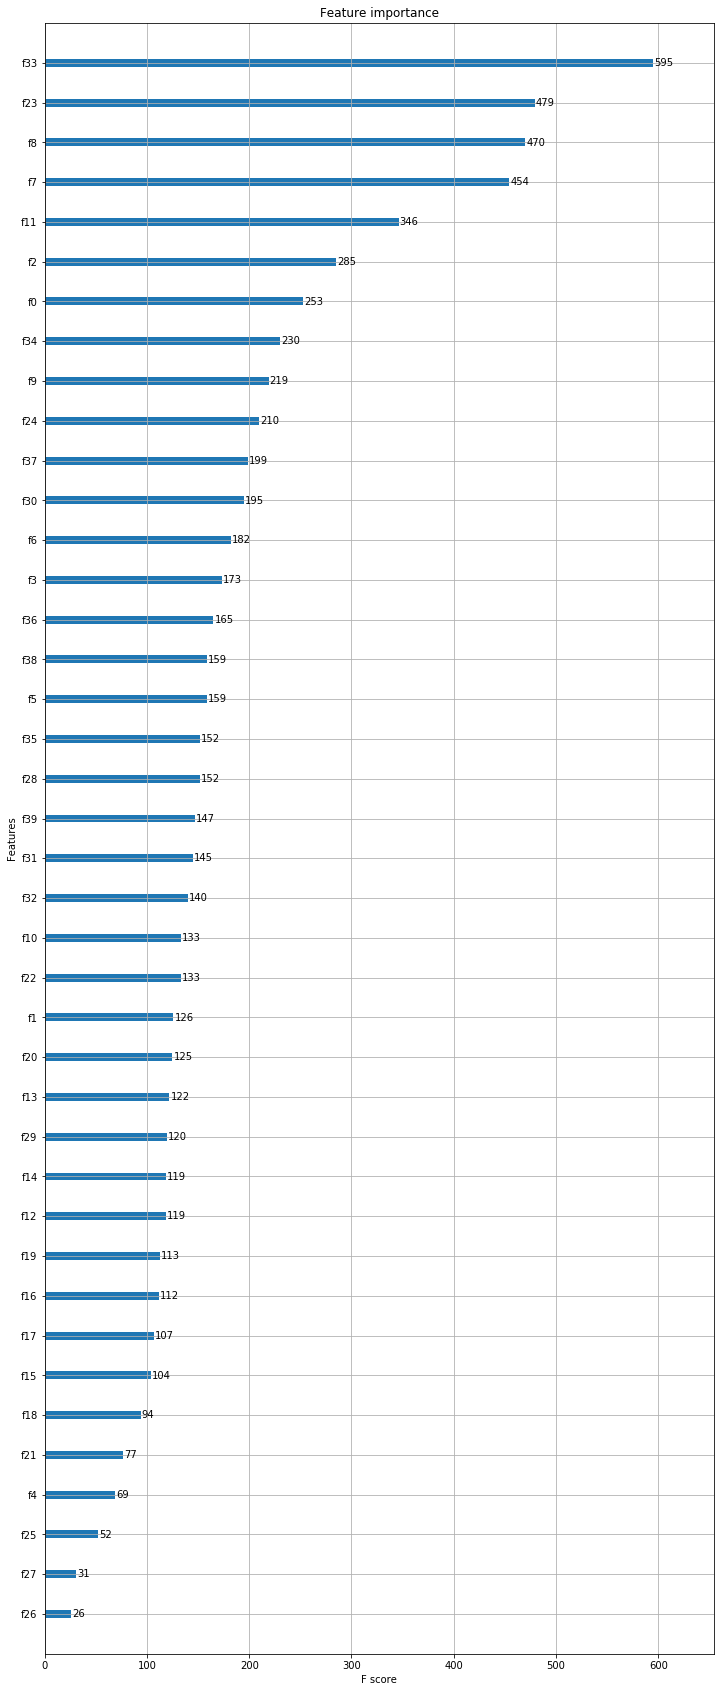

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 30.0)
xgb.plot_importance(bst); plt.show()

In [7]:
import lightgbm as lgbm
# 'metric': 'binary_logloss', 'num_boost_round' :1000,
t4_params = {
    'boosting_type': 'gbdt', 'objective': 'binary', 'nthread': 12, 'silent': True,
    'num_leaves': 2**6, 'learning_rate': 0.01, 'max_depth': 9,
    'max_bin': 255, 'subsample_for_bin': 50000,
    'subsample': 0.85, 'subsample_freq': 1, 'colsample_bytree': 0.80, 'reg_alpha':2, 'reg_lambda':0,
    'min_split_gain': 0.5, 'min_child_weight': 10, 'min_child_samples': 2, 'scale_pos_weight': 1}

from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

In [9]:
y_train = np.array(y)

train_stacker=[ [0.0 for s in range(1)]  for k in range (0,(x_train.shape[0])) ]

cv_scores = []
oof_preds = []
a = [0 for x in range(2345796)]
# StratifiedKFold
# kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=RS)
# for dev_index, val_index in kf.split(range(x_train.shape[0]),y_train):
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(x_train.shape[0])):
        dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]
        print dev_X.shape
        print val_X.shape
        
        pos_train = dev_X[dev_y == 1]
        neg_train = dev_X[dev_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        Xd = np.concatenate((pos_train, neg_train))
        yd = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        pos_train = val_X[val_y == 1]
        neg_train = val_X[val_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        Xv = np.concatenate((pos_train, neg_train))
        yv = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        print dev_X.shape
        print val_X.shape

        t4 = lgbm.sklearn.LGBMClassifier(n_estimators=2000, seed=2016, **t4_params)
        bst = t4.fit(Xd, yd, 
                       eval_set = [(Xv,yv)], eval_metric = 'logloss',early_stopping_rounds = 10, verbose =25) 

        preds = bst.predict_proba(Xv)
        cv_scores.append(log_loss(yv, preds))

        preds_tr = bst.predict_proba(x_test)

        a = np.column_stack((a,preds_tr[:,1]))
        print(cv_scores)

        predsorg = bst.predict_proba(val_X)

#         predictions = preds.reshape(-1,1)
        no=0
        for real_index in val_index:
            for d in range (0,1):
                train_stacker[real_index][d]=(predsorg[no][1])
            no+=1

(323432, 129)
(80858, 129)
Oversampling started for proportion: 0.369026565089
Oversampling done, new proportion: 0.191259632688
Oversampling started for proportion: 0.369883004774
Oversampling done, new proportion: 0.191181170815
(323432, 129)
(80858, 129)
Train until valid scores didn't improve in 10 rounds.
[25]	valid_0's binary_logloss: 0.529309
[50]	valid_0's binary_logloss: 0.421919
[75]	valid_0's binary_logloss: 0.348029
[100]	valid_0's binary_logloss: 0.295514
[125]	valid_0's binary_logloss: 0.257549
[150]	valid_0's binary_logloss: 0.229721
[175]	valid_0's binary_logloss: 0.209094
[200]	valid_0's binary_logloss: 0.193698
[225]	valid_0's binary_logloss: 0.182185
[250]	valid_0's binary_logloss: 0.173518
[275]	valid_0's binary_logloss: 0.166979
[300]	valid_0's binary_logloss: 0.162031
[325]	valid_0's binary_logloss: 0.158285
[350]	valid_0's binary_logloss: 0.155435
[375]	valid_0's binary_logloss: 0.153247
[400]	valid_0's binary_logloss: 0.151574
[425]	valid_0's binary_logloss: 0.1

In [10]:
# [0.14679638005158449, 0.14643568394088646, 0.14695301106657524, 0.14738008193419261, 0.14605956315322077]
# [0.14629926832710563, 0.14606952289254052, 0.14638265721616533, 0.14687541244637101, 0.14573516873536307]
# [0.1465937463512855, 0.14615366345193292, 0.1469229977170145, 0.14700542733023864, 0.14592327833231394]
# [0.14649405106690855, 0.14572850580037036, 0.14629378735040441, 0.14684076261763193, 0.1458625600681798]
# [0.14624227752384916, 0.14531761174638433, 0.14617043566238161, 0.14673412477280165, 0.14583243903690568]
# [0.14605673551927814, 0.14523948561000133, 0.14612940352463299, 0.14646254496931341, 0.14563881964088651]
b = pd.DataFrame(a)
b['sum'] = b.sum(axis = 1)/5

sub = pd.DataFrame()
sub['test_id'] = x4t['test_id']
sub['is_duplicate'] = b['sum']
sub.to_csv("lgbm_stack_2.csv", index=False)

In [17]:
np.savetxt("2train_stacker_lgbm1.gz", train_stacker, delimiter=",", fmt='%.6f')

np.savetxt("2test_stacker_lgbm1.gz", np.array(b['sum']), delimiter=",", fmt='%.6f')

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

bst = KNeighborsClassifier(n_neighbors=1024, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='minkowski', metric_params=None, n_jobs=1, )

x_train = np.column_stack((xgbtr,xgbtr1,lbmtr,nntr,nntr1,lstmtr1,sgtr,rftr,lrtr,glvtr,lstmtr2,sbtr1))

x_test = np.column_stack((xgbts,xgbts1,lbmts,nnts,nnts1,lstmts1,sgts,rfts,lrts,glvts,lstmts2,sbts1))

print x_train.shape
print x_test.shape

x_train[~np.isfinite(x_train)] = 0
x_test[~np.isfinite(x_test)] = 0

cv_scores = []
oof_preds = []

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
# for dev_index, val_index in kf.split(range(x_train.shape[0])):
for dev_index, val_index in kf.split(range(x_train.shape[0])):
        dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
        dev_y, val_y = y_train[dev_index], y_train[val_index]
        print dev_X.shape
        print val_X.shape
        
        pos_train = dev_X[dev_y == 1]
        neg_train = dev_X[dev_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        Xd = np.concatenate((pos_train, neg_train))
        yd = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        pos_train = val_X[val_y == 1]
        neg_train = val_X[val_y == 0]

        print("Oversampling started for proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))
        p = 0.165
        scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
        while scale > 1:
            neg_train = np.concatenate((neg_train, neg_train))
            scale -=1
        neg_train = np.concatenate((neg_train, neg_train[:int(scale * len(neg_train))]))
        print("Oversampling done, new proportion: {}".format(len(pos_train) / (len(pos_train) + len(neg_train))))

        Xv = np.concatenate((pos_train, neg_train))
        yv = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
        del pos_train, neg_train  

        print dev_X.shape
        print val_X.shape

#         t4 = lgbm.sklearn.LGBMClassifier(n_estimators=1000, seed=2016, **t4_params)
#         bst = t4.fit(Xd, yd, 
#                        eval_set = [(Xv,yv)], eval_metric = 'logloss',early_stopping_rounds = 10, verbose =25) 
        bst.fit(Xd,yd)

        preds = bst.predict_proba(Xv)
        cv_scores.append(log_loss(yv, preds))

        preds_tr = bst.predict_proba(x_test)

        a = np.column_stack((a,preds_tr[:,1]))
        print(cv_scores)

        predsorg = bst.predict_proba(val_X)

#         predictions = preds.reshape(-1,1)
        no=0
        for real_index in val_index:
            for d in range (0,1):
                train_stacker[real_index][d]=(predsorg[no][1])
            no+=1
    
#     dev_X, val_X = x_train[dev_index,:], x_train[val_index,:]
#         dev_y, val_y = y_train[dev_index], y_train[val_index]
#         model.fit(dev_X, dev_y)
#         preds =  model.predict_proba(val_X)
#         cv_scores.append(log_loss(val_y, preds))
#         predictions = preds.reshape( val_X.shape[0], 3)
#         print(cv_scores)
#         no=0
#         for real_index in val_index:
#             for d in range (0,3):
#                 train_stacker[real_index][d]=(predictions[no][d])
#             no+=1


(404290, 12)
(2345796, 12)
(323432, 12)
(80858, 12)
Oversampling started for proportion: 0.369026565089
Oversampling done, new proportion: 0.191259632688
Oversampling started for proportion: 0.369883004774
Oversampling done, new proportion: 0.191181170815
(323432, 12)
(80858, 12)


In [17]:
x_tr = np.column_stack((np.array(X),rstr[:,0:17],rstr[:,18:20],rspacetr[:,0:3],magic2tr,magic3tr,sbenchtr,
                           np.array(mgtr.iloc[:,2]),pgtr,sbtr1))

x_ts = np.column_stack((np.array(xtest),rsts[:,0:17],rsts[:,18:20],rspacets[:,0:3],magic2ts,magic3ts,sbenchts,
                          np.array(mgts.iloc[:,2]),pgts,sbts1))

print x_tr.shape
print x_ts.shape

(404290, 118)
(2345796, 118)


In [18]:
np.savetxt("train_nlp_feat.gz", x_tr, delimiter=",", fmt='%.6f')

np.savetxt("test_nlp_feat.gz", x_ts, delimiter=",", fmt='%.6f')